<a href="https://colab.research.google.com/github/marvinlemos/rcnn-dental-implants/blob/master/Implant_File_Supervisely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/supervisely/supervisely.git
!pip install -e ./supervisely

In [ ]:
import supervisely_lib as sly
import os
import json

# PyPlot only for rendering images inside Jupyter.
%matplotlib inline
import matplotlib.pyplot as plt

def draw_labeled_image(img, ann):
    canvas_draw_contour = img.copy()
    ann.draw_contour(canvas_draw_contour, thickness=30)
    fig = plt.figure(figsize=(17, 17))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    fig.add_subplot(1, 2, 2)
    plt.imshow(canvas_draw_contour)    
    plt.show()

In [ ]:
#@title TOKEN { run: "auto", vertical-output: true, display-mode: "both" }
token = "..." #@param {type:"string"}
SERVER = 'https://app.supervise.ly'

api = sly.Api(SERVER, token)

In [ ]:
# In Supervisely, a user can belong to multiple teams.
# Everyone has a default team with just their user in it.
# We will work in the context of that default team.
team = api.team.get_list()[0]

In [ ]:
team

TeamInfo(id=21607, name='marvinlemos@gmail.com', description='', role='admin', created_at='2019-12-18T11:02:14.930Z', updated_at='2019-12-18T11:02:14.930Z')

In [ ]:
# Query for all the workspaces in the selected team
workspaces = api.workspace.get_list(team.id)
print("Team {!r} contains {} workspaces:".format(team.name, len(workspaces)))
for workspace in workspaces:
    print("{:<8}{:<15s}".format(workspace.id, workspace.name))

Team 'marvinlemos@gmail.com' contains 5 workspaces:
23764   First Workspace
25787   Implant File   
28656   Treinamento Cães e Gatos
29711   tutorial_workspace
30064   Cães e Gatos - Modelos Pré-treinados


In [ ]:
workspace_name = 'Implant File'

workspace = api.workspace.get_info_by_name(team.id, workspace_name)

print(workspace)

WorkspaceInfo(id=25787, name='Implant File', description='', team_id=21607, created_at='2020-01-27T17:26:45.109Z', updated_at='2020-01-27T17:26:45.109Z')


## Project management
A project is a group of datasets with common labeling metadata (the set of available classes and tags). For example, one can have a project of labeled road scenes (so the taxonomy of the classes will relate to vehicles, pedestrians and road signs), and inside the project have a separate dataset for every day on which the data was collected.
We will start populating our new workspace by cloning one of the publically available in Supervisely projects into it.

In [ ]:
# Now we have a project in the new workspace, let us make sure there is only one. Query and print out the projects in the workspace:
projects = api.project.get_list(workspace.id)
print("Workspace {!r} contains {} projects:".format(workspace.name, len(projects)))
for project in projects:
    print("{:<5} {:<15s}".format(project.id, project.name))

Workspace 'Implant File' contains 14 projects:
58704 implantes      
60050 implantes_annotated
60052 implates_train 
60788 resultados2    
62383 implantes_plataforma
62760 implantes_plataforma_annotated
62761 implates_plataforma_train
62910 plataforma_result
62916 implantes2     
62919 implantes_for_test
62921 implantes2_annotated
62922 implates2_train
63818 implantes2_results
68259 implantes2 (#2)


In [ ]:
project_id = 60052 # 'implates_train'

# Get project info by name
project = api.project.get_info_by_id(project_id)
if project is None:
    print("Workspace {!r} not found".format(project_name))
else:
    print(project)
print()

ProjectInfo(id=60052, name='implates_train', description='', size='613518593', readme='', workspace_id=25787, created_at='2020-02-11T20:06:29.953Z', updated_at='2020-03-25T10:48:15.759Z')



In [ ]:
meta_json = api.project.get_meta(project.id)
meta = sly.ProjectMeta.from_json(meta_json)
print(meta)

ProjectMeta:
Object Classes
+---------------+-----------+----------------+
|      Name     |   Shape   |     Color      |
+---------------+-----------+----------------+
|   TF_HI_400   |  Polygon  | [200, 58, 203] |
|   TF_BF_400   |  Polygon  | [49, 254, 42]  |
| STR_CM_41X120 |  Polygon  | [92, 214, 204] |
|   TF_HE_375   |  Polygon  | [245, 166, 35] |
|   TF_HI_375   |  Polygon  | [87, 183, 100] |
|       bg      | Rectangle | [15, 22, 138]  |
+---------------+-----------+----------------+
Tags
+-------+------------+-----------------+
|  Name | Value type | Possible values |
+-------+------------+-----------------+
| train |    none    |       None      |
|  val  |    none    |       None      |
+-------+------------+-----------------+



### DATASETS

In [ ]:
datasets = api.dataset.get_list(project.id)
print("Project {!r} contains {} datasets:".format(project.name, len(datasets)))
for dataset in datasets:
    print("Id: {:<5} Name: {:<15s} images count: {:<5}".format(dataset.id, dataset.name, dataset.images_count))

Project 'implates_train' contains 3 datasets:
Id: 274852 Name: ds              images count: 704  
Id: 274853 Name: ds_001          images count: 88   
Id: 274854 Name: ds_002          images count: 220  


### Images of a dataset

In [ ]:
dataset = datasets[0]
images = api.image.get_list(dataset.id)
print("Dataset {!r} contains {} images:".format(dataset.name, len(images)))
for image in images[0:5]:
    print("Id: {:<5} Name: {:<15s} labels count: {:<5} size(bytes): {:<10} width: {:<5} height: {:<5}"
          .format(image.id, image.name, image.labels_count, image.size, image.width, image.height))

Dataset 'ds' contains 704 images:
Id: 131381674 Name: REF_BF4006_01.jpg labels count: 3     size(bytes): 1014310    width: 3345  height: 2324 
Id: 131381675 Name: REF_BF4006_01_tBPn0yQRZ7.jpg labels count: 3     size(bytes): 913074     width: 3063  height: 2360 
Id: 131381676 Name: REF_BF4006_01_1swUwgaEJ5.jpg labels count: 3     size(bytes): 744536     width: 2728  height: 2148 
Id: 131381677 Name: REF_BF4006_01_Psowy6Vptv.jpg labels count: 3     size(bytes): 734627     width: 2643  height: 2224 
Id: 131381678 Name: REF_BF4006_01_pfDmJmActL.jpg labels count: 3     size(bytes): 786168     width: 3054  height: 1997 


Image Shape: (2324, 3345, 3)


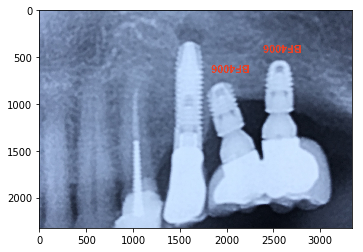

In [ ]:
# Download and display the image.
image = images[0]
img = api.image.download_np(image.id)
print("Image Shape: {}".format(img.shape))
imgplot = plt.imshow(img)

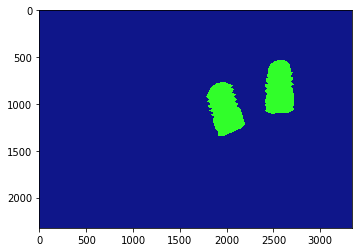

In [ ]:
#Google Colab doesnt have DejaVuSansMono (Supervisely default font)
from supervisely_lib.imaging import font as sly_font
sly_font.DEFAULT_FONT_FILE_NAME='LiberationMono-Italic.ttf'

# Download the serialized JSON annotation for the image.
ann_info = api.annotation.download(image.id)
# Parse the annotation using the Supervisely Python SDK
# and instantiate convenience wrappers for the objects in the annotation.
ann = sly.Annotation.from_json(ann_info.annotation, meta)

# Render the object labels on top of the original image.
img_with_ann = img.copy()
ann.draw(img_with_ann)
imgplot = plt.imshow(img_with_ann)

### Neural network management¶
Here we will only cover working with neural networks metadata. There is a separate tutorial (Supervisely Tutorial #4) on running neural network training and inference. First, we will clone one of the existing publically avaliable in Supervisely models into our workspace:

In [ ]:
# Set the destination model name within our workspace
model_name = 'implant_classifier_model' 

# Query the metadata for the copied model.
model = api.model.get_info_by_name(workspace.id, model_name)
print("Model {!r} has been sucessfully loaded: ".format(model.name))
print(model)

Model 'implant_classifier_model' has been sucessfully loaded: 
ModelInfo(id=14065, name='implant_classifier_model', description='', config={'classes': [{'color': '#C83ACB', 'shape': 'bitmap', 'title': 'TF_HI_400', 'geometry_config': {}}, {'color': '#31FE2A', 'shape': 'bitmap', 'title': 'TF_BF_400', 'geometry_config': {}}, {'color': '#5CD6CC', 'shape': 'bitmap', 'title': 'STR_CM_41X120', 'geometry_config': {}}, {'color': '#F5A623', 'shape': 'bitmap', 'title': 'TF_HE_375', 'geometry_config': {}}, {'color': '#57B764', 'shape': 'bitmap', 'title': 'TF_HI_375', 'geometry_config': {}}, {'color': '#0F168A', 'shape': 'bitmap', 'title': 'bg', 'geometry_config': {}}], 'settings': {'lr': 0.001, 'epochs': 25, 'batch_size': {'val': 1, 'train': 1}, 'input_size': {'width': 0, 'height': 0, 'max_dim': 256, 'min_dim': 256}, 'gpu_devices': [0], 'dataset_tags': {'val': 'val', 'train': 'train'}, 'train_layers': 'all', 'special_classes': {'background': 'bg'}, 'weights_init_type': 'transfer_learning'}, 'class

### Select the agent to use
Neural network inference is a computationally intensive process, so it is infeasible to have the inference run on the same machine that serves the Supervisely web instance. Instead, you need to connect a worker machine (with a GPU) to the web instance to run the computations. The worker is connected using the Supervisely Agent - an open-source daemon that runs on the worker, connects to the web instance and listens for tasks to execute. See https://github.com/supervisely/supervisely/tree/master/agent for details on how to run the agent.

From now on the tutorial assumes that you have launched the agent on your worker machine and it shows up on your "Cluster" page in the Supervisely web instance. We first query the instance for the agent ID by name.

In [ ]:
# Replace this with your agent name. You can find the list of
# all your agents in the "Cluster" menu in the Supervisely instance.
agent_name = "Attractive Rabbit"

agent = api.agent.get_info_by_name(team.id, agent_name)
if agent is None:
    raise RuntimeError("Agent {!r} not found".format(agent_name))
if agent.status is api.agent.Status.WAITING:
    raise RuntimeError("Agent {!r} is not running".format(agent_name))

### Online on-demand inference¶
We have all the pre-requisites in place, time to get started with model inference.

### Deploy the model to the agent for on-demand inference
The first step is to deploy the model to the agent. Deployment involves:

- copying the model weights and configuration to the agent,
- launching a Docker container with the model code that loads the weights onto the worker GPU and starts waiting for inference requests.

In [ ]:
# Just in case that the model has been already deployed
# (maybe you are re-running some of this tutorial several times)
# we want to reuse the already deployed version.
#
# Query the web instance for already deployed instances of our model.
task_ids = api.model.get_deploy_tasks(model.id)

# Deploy if necessary.
if len(task_ids) == 0:
    print('Model {!r} is not deployed. Deploying...'.format(model.name))
    task_id = api.task.deploy_model(agent.id, model.id)
    # deploy_model() kicks off an asynchronous task that may take
    # quite a long time - after all, the agent on the worker needs to
    # * Download the model weights from web instance.
    # * Pull the docker image with the model code.
    # * Launch a docker image and wait for it to load the weights onto the GPU.
    #
    # Since we don't have other tasks to process, simply wait
    # for deployment to finish.
    api.task.wait(task_id, api.task.Status.DEPLOYED)
else:
    print('Model {!r} has been already deployed'.format(model.name))
    task_id = task_ids[0]

print('Deploy task_id = {}'.format(task_id))

Model 'implant_classifier_model' is not deployed. Deploying...
Deploy task_id = 161534


In [ ]:
meta_json = api.model.get_output_meta(model.id)
model_meta = sly.ProjectMeta.from_json(meta_json)
print(model_meta)

ProjectMeta:
Object Classes
+---------------------+--------+----------------+
|         Name        | Shape  |     Color      |
+---------------------+--------+----------------+
|   TF_HI_400_model   | Bitmap | [200, 58, 203] |
|   TF_BF_400_model   | Bitmap | [49, 254, 42]  |
| STR_CM_41X120_model | Bitmap | [92, 214, 204] |
|   TF_HE_375_model   | Bitmap | [245, 166, 35] |
|   TF_HI_375_model   | Bitmap | [87, 183, 100] |
|       bg_model      | Bitmap | [15, 22, 138]  |
+---------------------+--------+----------------+
Tags
+------------------+------------+-----------------+
|       Name       | Value type | Possible values |
+------------------+------------+-----------------+
| confidence_model | any_number |       None      |
+------------------+------------+-----------------+



### Inference with a locally stored image
We can finally start with inference requests. First example shows how to deal with an image loaded into local memory as a Numpy array. The inference result is a serialized image Annotation, another fundamental class from our SDK that stores image labeling data. See our tutorial #1 for a detailed look at image annotations.

TF_HI_375_model
TF_HI_375_model
TF_HI_375_model


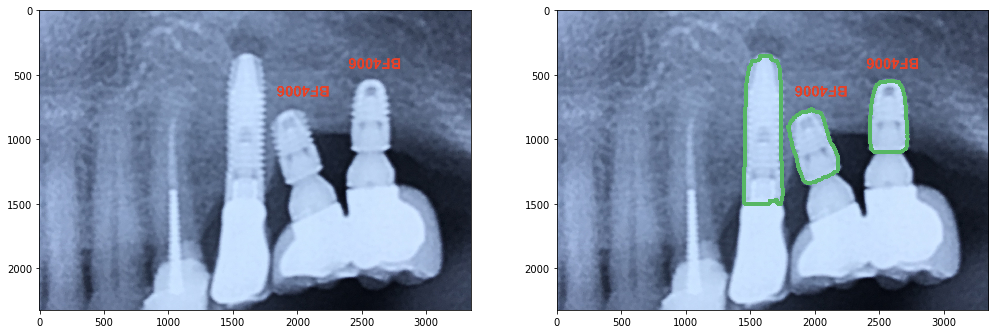

In [ ]:
#img = sly.image.read('./image_01.jpeg')
image = images[0]
img = api.image.download_np(image.id)

# Make an inference request, get a JSON serialized image annotation.
#ann_json = api.model.inference(model.id, img)
ann_json = api.model.inference(model.id, img)


# Deserialize the annotation using the model meta information that
# we received previously.
ann = sly.Annotation.from_json(ann_json, model_meta)

# Print the classes
for label in ann.labels:
  print(label.obj_class.name)
  
# Render the inference results.
draw_labeled_image(img, ann)

TF_HI_375_model
TF_HI_375_model
TF_HI_375_model
